In [1]:
import numpy as np
import scipy as sp
import sympy as smp
from scipy.integrate import quad
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

Suppose two charges $\pm q$ are seperated by $\vec{d}$ (which points from $-q$ to $+q$) with their center at point $\vec{r}'$. In the limit $|\vec{d}| \to 0$ and $q|\vec{d}|=\text{constant}$, the electric potential at a point $\vec{r}$ is given by

$$\phi(\vec{r}) = \frac{1}{4 \pi \epsilon_0}\frac{\vec{p} \cdot (\vec{r}-\vec{r}')}{|\vec{r}-\vec{r}'|^3}$$

where $\vec{p} = q\vec{d}$. This charge configuration is called an electric dipole with dipole moment $\vec{p}$. Suppose there exist many dipoles in some medium all closely packed together. Then we can write $d\vec{p} = \vec{P}(\vec{r'})d\tau$ where $d\vec{p}$ is the total dipole moment in that small area of space, $\vec{P}$ is the conveniently defined **dipole density**, and $d\tau$ corresponds to a region of space: either

* $d\tau = |d\vec{r'}|$ (one dimension)
* $d\tau = |\vec{r}'_u \times \vec{r}'_v|dudv$ (two dimensions)
* $d\tau = dV$ (three dimensions)

Then the total potential is given by

$$\phi(\vec{r}) = \frac{1}{4 \pi \epsilon_0} \int_{S}\frac{\vec{P}(\vec{r}') \cdot (\vec{r}-\vec{r}')}{|\vec{r}-\vec{r}'|^3} d\tau$$

where $S$ is the region of space one wishes to integrate over.

# Example: 1 Dimension

* **The Shape of the Object**: $\vec{r}'(t) = R(2\cos 4t, 2\sin 4t, t)$ from $-\pi/2 \leq t \leq \pi/2$ where $R$ is a reference length
* **The Polarization**: $\vec{P}(\vec{r}') = P_0|z|\hat{z}$
* **The Position in Space**: $\vec{r} = (x,y,z)$
* **The Volume Element**: $d\tau = |d\vec{r}'| = \left| \frac{d\vec{r}'}{dt} \right| dt$

First we write everything in terms of the reference length and make everything dimensionless:

$$\frac{4 \pi \epsilon_0 R}{P_0} \phi(\vec{r}) =  \int_{-\pi/2}^{\pi/2} \frac{\vec{P}(\vec{r}'/R)/P_0 \cdot (\vec{r}/R-\vec{r}'/R)}{|\vec{r}/R-\vec{r}'/R|^3} \left| \frac{d\vec{r}'/R}{dt} \right| dt$$

In [77]:
# define the symbols and functions  

t = smp.symbols('t',real=True)
x,y,z = smp.symbols('x,y,z',real=True)
xp,yp,zp = smp.symbols('x_p,y_p,z_p',cls=smp.Function)
Px,Py,Pz = smp.symbols('P_x,P_y,P_z', cls=smp.Function)

In [78]:
# define primes (coordinates of the dipoles) as a functions of t 
xp,yp,zp = xp(t),yp(t),zp(t)

In [79]:
# define the polerization 
Px = 0
Py = 0
Pz = smp.Abs(zp)

Define $\vec{r}$, $\vec{r}'$ and $\vec{P}$ in terms of everything else so far

In [80]:
r = smp.Matrix([x,y,z])
r_p = smp.Matrix([xp,yp,zp])
P = smp.Matrix([Px,Py,Pz])
sep = r - r_p

In [81]:
# let's get the intergrand 
integrand = P.dot(sep)/sep.norm()**3 * smp.diff(r_p,t).norm()
integrand

(z - z_p(t))*sqrt(Abs(Derivative(x_p(t), t))**2 + Abs(Derivative(y_p(t), t))**2 + Abs(Derivative(z_p(t), t))**2)*Abs(z_p(t))/(Abs(x - x_p(t))**2 + Abs(y - y_p(t))**2 + Abs(z - z_p(t))**2)**(3/2)

In [82]:
integrand = integrand.subs([(xp,2*smp.cos(4*t)),(yp,2*smp.sin(4*t)),(zp,t)]).simplify()
integrand

-sqrt(65)*(t - z)*Abs(t)/((t - z)**2 + (x - 2*cos(4*t))**2 + (y - 2*sin(4*t))**2)**(3/2)

In [83]:
integrand_f = smp.lambdify([t,x,y,z],integrand)

In [84]:
integrand_f(2,1,1,1)

-2.3366972590435653

In [85]:
def Phi(x,y,z):
    return quad(integrand_f,-np.pi/2,np.pi/2,args=(x,y,z))[0]

In [86]:
x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)
xv,yv = np.meshgrid(x,y)
phi = np.vectorize(Phi)(xv,yv,0)

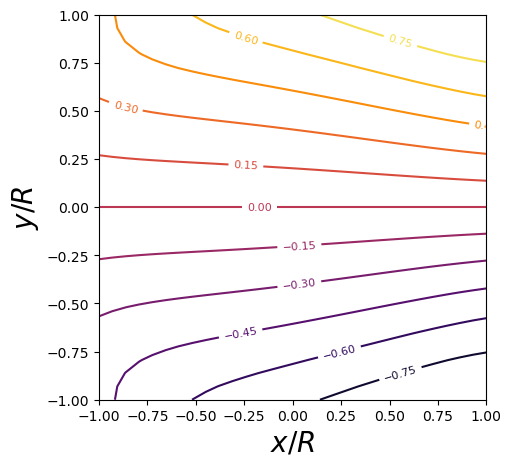

In [87]:
# plot 
fig, ax = plt.subplots(1,1,figsize=(5,5))
cs = plt.contour(xv,yv,phi, levels=15, cmap='inferno')
plt.clabel(cs, fontsize=8)
plt.xlabel('$x/R$', fontsize=20)
plt.ylabel('$y/R$', fontsize=20)
plt.show()

# Example: 2 Dimensions

Assume now that all dimensions are expressed as ratios of $R$. This means we don't have to write $\vec{r}/R$ all the time.

* **The Shape of the Object**: $\vec{r}'(u,v) = (u\cos(v), u\sin(v), u^2)$ from $0 \leq u \leq 2$ and $0 \leq v \leq 2\pi$ where
* **The Polarization**: $\vec{P}(\vec{r}') = P_0 e^{-|x|^2}\hat{z}$
* **The Position in Space**: $\vec{r} = (x,y,z)$
* **The Volume Element**: $d\tau = |\vec{r}'_u \times \vec{r}'_v|dudv$

In [88]:
u,v = smp.symbols('u v',real=True)
x,y,z = smp.symbols('x y z',real =True)
xp,yp,zp = smp.symbols('x_p y_p z_p', cls=smp.Function)
Px,Py,Pz = smp.symbols('P_x P_y P_z', cls=smp.Function)

In [89]:
# define prime coordinates (coordinates of the source)
xp = xp(u,v)
yp = yp(u,v)
zp = zp(u,v)

In [90]:
# define polerizations 
Px = smp.zeros(1)
Py = smp.zeros(1)
Pz = smp.exp(-xp**2)

In [91]:
# r, r_prime and P matrices in cartisian coordinates 
r = smp.Matrix([x,y,z])
rp = smp.Matrix([xp,yp,zp])
P = smp.Matrix([Px,Py,Pz])
sep = r -rp
P

Matrix([
[                 0],
[                 0],
[exp(-x_p(u, v)**2)]])

In [92]:
P

Matrix([
[                 0],
[                 0],
[exp(-x_p(u, v)**2)]])

In [93]:
# define the volume element 
smp.diff(rp,u)

Matrix([
[Derivative(x_p(u, v), u)],
[Derivative(y_p(u, v), u)],
[Derivative(z_p(u, v), u)]])

In [94]:
dTau = (smp.diff(rp,u).cross(smp.diff(rp,v))).norm()
dTau

sqrt(Abs(Derivative(x_p(u, v), u)*Derivative(y_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(y_p(u, v), u))**2 + Abs(Derivative(x_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(z_p(u, v), u))**2 + Abs(Derivative(y_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(y_p(u, v), v)*Derivative(z_p(u, v), u))**2)

In [95]:
# integrand 

integrand = P.dot(sep)/sep.norm()**3 * dTau
integrand

(z - z_p(u, v))*sqrt(Abs(Derivative(x_p(u, v), u)*Derivative(y_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(y_p(u, v), u))**2 + Abs(Derivative(x_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(z_p(u, v), u))**2 + Abs(Derivative(y_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(y_p(u, v), v)*Derivative(z_p(u, v), u))**2)*exp(-x_p(u, v)**2)/(Abs(x - x_p(u, v))**2 + Abs(y - y_p(u, v))**2 + Abs(z - z_p(u, v))**2)**(3/2)

In [96]:
# substitue xp,yp and zp using the free paramters u and v 
integrand = integrand.subs([(xp,u*smp.cos(v)),(yp,u*smp.sin(v)),(zp,u**2)]).simplify()
integrand

(-u**2 + z)*sqrt(4*u**2 + 1)*exp(-u**2*cos(v)**2)*Abs(u)/((u**2 - z)**2 + (-u*sin(v) + y)**2 + (-u*cos(v) + x)**2)**(3/2)

In [97]:
# create a numerical function 
integrand_f = smp.lambdify([u,v,x,y,z],integrand)

def Phi(x,y,z):
    return dblquad(integrand_f,0,2*np.pi,lambda x:0,lambda x:2,args=(x,y,z))[0]

In [98]:
# get the electric potential at pre defind points in space
x = np.linspace(-0.5, 0.5, 30)
y = np.linspace(-0.5, 0.5, 30)
xv, yv = np.meshgrid(x, y)
phi = np.vectorize(Phi)(xv, yv, 2)

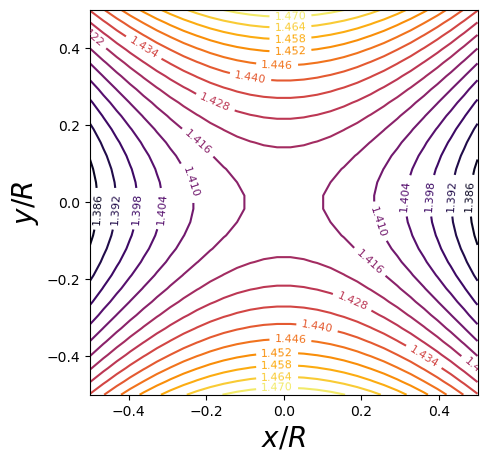

In [99]:
# plot 
fig, ax = plt.subplots(1,1,figsize=(5,5))
cs = plt.contour(xv,yv,phi, levels=15, cmap='inferno')
plt.clabel(cs, fontsize=8)
plt.xlabel('$x/R$', fontsize=20)
plt.ylabel('$y/R$', fontsize=20)
plt.show()